# Approach 2: 
In this approach we first use the data as a binary problem, by  using the label column only.
Then after the binary classification is done based on Normal or attack, We drop the Normal rows then start the multiclassification by predicting the attacks with its different categories based on the attack_cat column only.
This approach is done twice without feature extraction and with feature extraction using XGBOOST.


# **Required Library**

In [1]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.metrics import f1_score
import time
import json
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
import matplotlib.pyplot as plt
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random 
from sklearn import metrics
#!pip install xgboost
from sklearn.feature_selection import SelectFromModel
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score,confusion_matrix

# With feature extraction 

# Data preprocessing

# **Load Data**

In [2]:
df_TR = pd.read_csv(r"UNSW_NB15_testing-set.csv")
df_TS = pd.read_csv(r"UNSW_NB15_training-set.csv")
df_TR

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# **Check for Nan and Null in training data**


In [3]:

# Check for NAN and NULL in training data
pd.set_option('display.max_columns', None)

isna = pd.DataFrame(df_TR.isna().sum().values.reshape(1, 45), columns=df_TR.columns, index=['NA'])
isnull = pd.DataFrame(df_TR.isnull().sum().values.reshape(1, 45), columns=df_TR.columns, index=['Null'])

print(pd.concat([isna, isnull]).sum().sum())
pd.concat([isna, isnull])



0


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Check for Nan and Null in Testing data**


In [4]:

# Check for NAN and NULL in testing data
pd.set_option('display.max_columns', None)

isna = pd.DataFrame(df_TS.isna().sum().values.reshape(1, 45), columns=df_TS.columns, index=['NA'])
isnull = pd.DataFrame(df_TS.isnull().sum().values.reshape(1, 45), columns=df_TS.columns, index=['Null'])

print(pd.concat([isna, isnull]).sum().sum())
pd.concat([isna, isnull])

# checking if Training data has Null values
df_TR.info()

# checking if test data has Null values
df_TS.info()



0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  

# **Check for garbage values in data**


In [5]:

# Check if  train data contain space or dash in taining data
print('Number of space values =', (df_TR ==' ').sum().sum()) # check if there is space
print('Number of "-" values =', (df_TR =='-').sum().sum())
print("-------------------------------------------------")
(df_TR =='-').sum()  # check for '-'

# Check if test data contain space or dash
print('Number of space values =', (df_TS ==' ').sum().sum()) # check if there is space
print('Number of "-" values =', (df_TS =='-').sum().sum())
print("-------------------------------------------------")
(df_TS =='-').sum()  # check for '-'




Number of space values = 0
Number of "-" values = 94168
-------------------------------------------------
Number of space values = 0
Number of "-" values = 47153
-------------------------------------------------


id                       0
dur                      0
proto                    0
service              47153
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

# **Check for duplication**


In [6]:

duplication = df_TR[df_TR.duplicated()]
duplication

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label


In [7]:
df_TR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [8]:
df_TR.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.496000,56716.824000,1.460480e+06,289388.269700,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
df_TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [10]:
df_TS.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [11]:
#_Cleaning the data according to the service column, drop the rows that contains '-'
df_TR=df_TR.iloc[df_TR['service'].replace(['-'], np.nan).dropna().index.to_numpy(), :].reset_index(drop = True)
df_TS=df_TS.iloc[df_TS['service'].replace(['-'], np.nan).dropna().index.to_numpy(), :].reset_index(drop = True)
# **Check for duplication**

duplication = df_TR[df_TR.duplicated()]
duplication

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label


# **Divide data to Features and Labels**

In [12]:

X_TR =df_TR.drop('label',axis=1) 
Y_TR1 =df_TR['label']
X_TS =df_TS.drop('label',axis=1) 
Y_TS1 =df_TS['label']


# **visualize data**

Text(0.5, 1.0, 'Number of attacks per Attack caterogy')

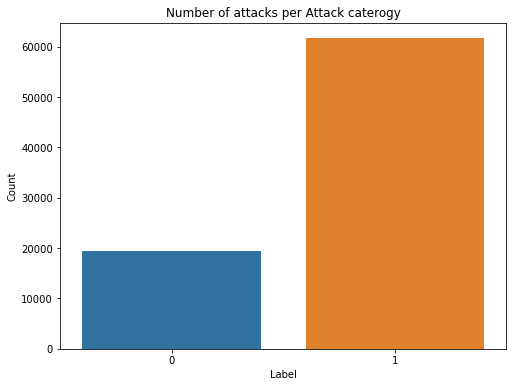

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_TR['label'].value_counts().index,y=df_TR['label'].value_counts())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')


Text(0.5, 1.0, 'Number of attacks per Attack caterogy')

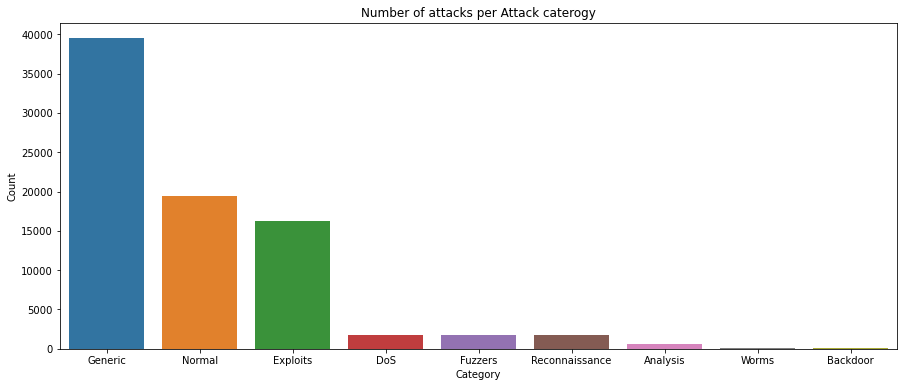

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_TR['attack_cat'].value_counts().index,y=df_TR['attack_cat'].value_counts())
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')

# **Label Encoding**

In [15]:

le = preprocessing.LabelEncoder()

# label Encoding for the categorical columns 
le.fit(X_TR['proto'])
X_TR['proto']=le.transform(X_TR['proto'])
X_TS['proto']=le.transform(X_TS['proto'])

le.fit(X_TR['service'])
X_TR['service']=le.transform(X_TR['service'])
X_TS['service']=le.transform(X_TS['service'])

# le.fit(X_TS['state'])
X_TR['state'] =X_TR['state'].replace( ['INT', 'FIN', 'CON', 'REQ', 'RST', 'ECO','no', 'URN', 'PAR', 'ACC', 'CLO'],[ 0 , 1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10 ])
X_TS['state'] =X_TS['state'].replace( ['INT', 'FIN', 'CON', 'REQ', 'RST', 'ECO','no', 'URN', 'PAR', 'ACC', 'CLO'],[ 0 , 1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10 ])

le.fit(X_TR['attack_cat'])
X_TR['attack_cat']=le.transform(X_TR['attack_cat'])
X_TS['attack_cat']=le.transform(X_TS['attack_cat'])


#################################################################
X_TR

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,4,1.681642,0,2,1,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,6
1,12,2.093085,0,8,1,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0,6
2,16,0.000002,1,9,0,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,6
3,18,0.393556,0,4,1,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0,6
4,22,0.338017,0,4,1,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,175336,0.000006,1,1,0,2,0,114,0,166666.660800,254,0,7.600000e+07,0.000000,0,0,0.006000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,45,2,33,33,17,45,0,0,0,33,45,0,5
81169,175337,0.000009,1,1,0,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,5
81170,175339,0.000009,1,1,0,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,5
81171,175340,0.000009,1,1,0,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,5


In [16]:
# Dropping the id column and attack_cat column 
Y_TR2 =X_TR['attack_cat']
X_TR =X_TR.drop('attack_cat',axis=1) 
X_TR =X_TR.drop('id',axis=1) 

#Y_TR =X_TR['attack_cat']
Y_TS2 =X_TS['attack_cat']
X_TS =X_TS.drop('attack_cat',axis=1) 
X_TS =X_TS.drop('id',axis=1) 

X_TR

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1.681642,0,2,1,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0
1,2.093085,0,8,1,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0
2,0.000002,1,9,0,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0
3,0.393556,0,4,1,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0
4,0.338017,0,4,1,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,0.000006,1,1,0,2,0,114,0,166666.660800,254,0,7.600000e+07,0.000000,0,0,0.006000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,45,2,33,33,17,45,0,0,0,33,45,0
81169,0.000009,1,1,0,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0
81170,0.000009,1,1,0,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0
81171,0.000009,1,1,0,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0


# **Data Normalization**

In [17]:

# data normalization for training data 
X = X_TR.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_TR = pd.DataFrame(x_scaled,columns=X_TR.columns)

# data normalization for Test data 
X = X_TS.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_TS = pd.DataFrame(x_scaled,columns=X_TS.columns)


# Ensemble model using Decision tree and Logistic regression

# Binary classification


In [18]:


# stacking ensemble 
def Stacking():
    # the base model DT and LR
  models_list = list()
  models_list.append(('cart', DecisionTreeClassifier()))
  models_list.append(('lr', LogisticRegression()))
  final_est = LogisticRegression()
  model = StackingClassifier(estimators=models_list, final_estimator=final_est, cv=5)
  return model

# get a list of models to evaluate
def Models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['cart'] = DecisionTreeClassifier()
    models['stacking'] = Stacking()
    return models

# evaluate a give model using cross-validation
def evaluate(model, X_TR, Y_TR):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model,  X_TR, Y_TR, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


>lr 0.978 (0.001)
>cart 0.984 (0.001)
>stacking 0.978 (0.001)


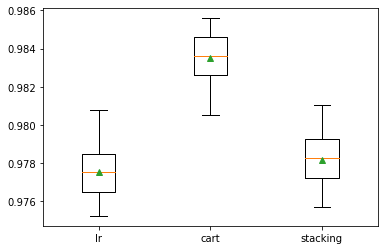

C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Accuracy: 0.9202365047329373


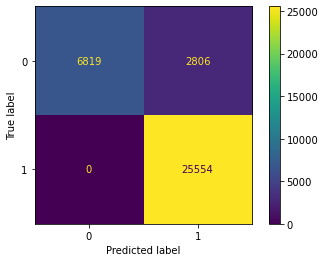

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      9625
           1       0.90      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.85      0.89     35179
weighted avg       0.93      0.92      0.92     35179



In [19]:

#________________Classification using the stacking model_______________
# get the models to evaluate
models = Models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate(model, X_TR, Y_TR1)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
model.fit(X_TR, Y_TR1)
y_pred=model.predict(X_TS)



# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score( Y_TS1, y_pred))

plot_confusion_matrix(model, X_TS, Y_TS1,values_format= "d")  
plt.show()


print(classification_report( Y_TS1, y_pred))



# Multiclassification


In [20]:
# firstly combining the data again then dropping the rows which have Normal output
Y_1=pd.DataFrame(Y_TR1)
Y_2=pd.DataFrame(Y_TR2)
Y_11=pd.DataFrame(Y_TS1)
Y_22=pd.DataFrame(Y_TS2)

df_train = pd.concat([X_TR,Y_2,Y_1],axis=1)
df_test =pd.concat([X_TS,Y_22,Y_11],axis=1)
df_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,2.802780e-02,0.0,0.181818,0.25,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,0.000150,0.000208,0.000547,1.092583e-02,0.006449,0.000275,0.017249,1.0,0.257772,0.243888,1.0,0.000000,0.000000,0.000000,0.006777,0.043896,0.000000,0.000000,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.25,0.25,0.000000,0.016949,0.000000,0.0,6,0
1,3.488529e-02,0.0,0.727273,0.25,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,0.000364,0.005830,0.001459,2.452283e-03,0.005367,0.003456,0.000367,1.0,0.424852,0.200410,1.0,0.087972,0.103000,0.054975,0.652108,0.054184,0.000000,0.000000,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.00,0.00,0.000000,0.000000,0.000000,0.0,6,0
2,1.666693e-08,1.0,0.818182,0.00,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,0.000000,0.000000,0.000000,1.429367e-07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.019578,0.000000,0.000000,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.00,0.00,0.000000,0.016949,0.000000,0.0,6,0
3,6.559354e-03,0.0,0.363636,0.25,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,0.000869,0.000416,0.000365,3.125199e-03,0.003407,0.002257,0.000248,1.0,0.904076,0.718098,1.0,0.080709,0.115373,0.042914,0.032380,0.093964,0.005814,0.000016,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.00,0.00,0.033333,0.000000,0.039216,0.0,6,0
4,5.633690e-03,0.0,0.363636,0.25,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,0.000236,0.000416,0.000182,2.516980e-03,0.004044,0.002049,0.000283,1.0,0.620722,0.819917,1.0,0.103597,0.107399,0.069747,0.042922,0.030864,0.005814,0.000000,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.00,0.00,0.033333,0.016949,0.039216,0.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,8.333466e-08,1.0,0.090909,0.00,0.000104,0.000000,0.000001,0.000000,0.166667,0.995536,0.000000,0.032986,0.000000,0.000000,0.000000,4.288100e-07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010542,0.000000,0.000000,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.00,0.00,0.000000,0.542373,0.862745,0.0,5,1
81169,1.333355e-07,1.0,0.090909,0.00,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,0.000000,0.000000,0.000000,6.432150e-07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010542,0.000000,0.000000,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.00,0.00,0.000000,0.389831,0.450980,0.0,5,1
81170,1.333355e-07,1.0,0.090909,0.00,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,0.000000,0.000000,0.000000,6.432150e-07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010542,0.000000,0.000000,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.00,0.00,0.000000,0.033898,0.215686,0.0,5,1
81171,1.333355e-07,1.0,0.090909,0.00,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,0.000000,0.000000,0.000000,6.432150e-07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010542,0.000000,0.000000,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.00,0.00,0.000000,0.491525,0.568627,0.0,5,1


In [21]:
counter = Counter(Y_TR2)
print(counter)

Counter({5: 39496, 6: 19488, 3: 16187, 2: 1791, 4: 1731, 7: 1703, 0: 564, 8: 114, 1: 99})


In [22]:
#Dropping the Normal rows which has 0 output in the label
df_train=df_train.iloc[df_train['label'].replace([0], np.nan).dropna().index.to_numpy(), :].reset_index(drop = True)
df_test=df_test.iloc[df_test['label'].replace([0], np.nan).dropna().index.to_numpy(), :].reset_index(drop = True)

In [23]:
# Dropping the label column and use the attack_cat for the multiclassification
X_TR =df_train.drop('label',axis=1) 
Y_TR =df_train['attack_cat']
X_TR =df_train.drop('attack_cat',axis=1) 

X_TS =df_test.drop('label',axis=1) 
Y_TS =df_test['attack_cat']
X_TS =df_test.drop('attack_cat',axis=1) 

In [24]:
counter = Counter(Y_TR)
print(counter)

Counter({5: 39496, 3: 16187, 2: 1791, 4: 1731, 7: 1703, 0: 564, 8: 114, 1: 99})


>lr 0.915 (0.002)
>cart 0.925 (0.003)
>stacking 0.931 (0.002)


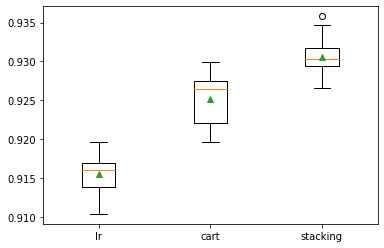

C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

StackingClassifier(cv=5,
                   estimators=[('cart', DecisionTreeClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [25]:
#_______________________________________Stacking for the multiclassification______________
# get the models to evaluate
models = Models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate(model, X_TR, Y_TR)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
model.fit(X_TR, Y_TR)

Accuracy: 0.915199186037411


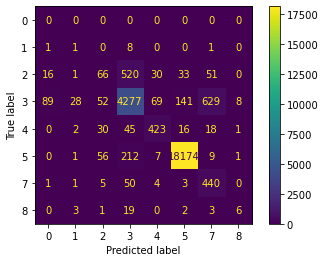

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      0.09      0.04        11
           2       0.31      0.09      0.14       717
           3       0.83      0.81      0.82      5293
           4       0.79      0.79      0.79       535
           5       0.99      0.98      0.99     18460
           7       0.38      0.87      0.53       504
           8       0.38      0.18      0.24        34

    accuracy                           0.92     25554
   macro avg       0.46      0.48      0.44     25554
weighted avg       0.92      0.92      0.91     25554



C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:

y_pred=model.predict(X_TS)

# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score( Y_TS, y_pred))
plot_confusion_matrix(model, X_TS, Y_TS,values_format= "d")  
plt.show()
print(classification_report( Y_TS, y_pred))



# With feature extraction based on XGBOOST

In [27]:
#_________ Same data preprocessing____________
df_TR = pd.read_csv(r"UNSW_NB15_testing-set.csv")
df_TS = pd.read_csv(r"UNSW_NB15_training-set.csv")
df_TR
df_TR=df_TR.iloc[df_TR['service'].replace(['-'], np.nan).dropna().index.to_numpy(), :].reset_index(drop = True)
df_TS=df_TS.iloc[df_TS['service'].replace(['-'], np.nan).dropna().index.to_numpy(), :].reset_index(drop = True)
X_TR =df_TR.drop('label',axis=1) 
Y_TR1 =df_TR['label']
X_TS =df_TS.drop('label',axis=1) 
Y_TS1 =df_TS['label']

le = preprocessing.LabelEncoder()

# label Encoding for Training data
le.fit(X_TR['proto'])
X_TR['proto']=le.transform(X_TR['proto'])
X_TS['proto']=le.transform(X_TS['proto'])

le.fit(X_TR['service'])
X_TR['service']=le.transform(X_TR['service'])
X_TS['service']=le.transform(X_TS['service'])

# le.fit(X_TS['state'])
X_TR['state'] =X_TR['state'].replace( ['INT', 'FIN', 'CON', 'REQ', 'RST', 'ECO','no', 'URN', 'PAR', 'ACC', 'CLO'],[ 0 , 1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10 ])
X_TS['state'] =X_TS['state'].replace( ['INT', 'FIN', 'CON', 'REQ', 'RST', 'ECO','no', 'URN', 'PAR', 'ACC', 'CLO'],[ 0 , 1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10 ])

le.fit(X_TR['attack_cat'])
X_TR['attack_cat']=le.transform(X_TR['attack_cat'])
X_TS['attack_cat']=le.transform(X_TS['attack_cat'])


#################################################################
Y_TR2 =X_TR['attack_cat']
X_TR =X_TR.drop('attack_cat',axis=1) 
X_TR =X_TR.drop('id',axis=1) 

Y_TS2 =X_TS['attack_cat']
X_TS =X_TS.drop('attack_cat',axis=1) 
X_TS =X_TS.drop('id',axis=1) 

#####################################################33

# data normalization for training data 
X = X_TR.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_TR = pd.DataFrame(x_scaled,columns=X_TR.columns)

# data normalization for Test data 
X = X_TS.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_TS = pd.DataFrame(x_scaled,columns=X_TS.columns)

C:\Users\Moshira\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.00081
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00195
Feature: 3, Score: 0.00287
Feature: 4, Score: 0.00125
Feature: 5, Score: 0.00234
Feature: 6, Score: 0.01770
Feature: 7, Score: 0.00479
Feature: 8, Score: 0.00078
Feature: 9, Score: 0.05082
Feature: 10, Score: 0.52128
Feature: 11, Score: 0.00043
Feature: 12, Score: 0.00040
Feature: 13, Score: 0.00110
Feature: 14, Score: 0.00153
Feature: 15, Score: 0.00036
Feature: 16, Score: 0.00080
Feature: 17, Score: 0.00035
Feature: 18, Score: 0.00039
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00026
Feature: 21, Score: 0.00028
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00065
Feature: 24, Score: 0.00059

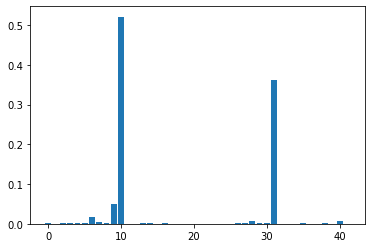

[05:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['sttl', 'dttl', 'ct_state_ttl'], dtype='object')


In [28]:
#________________________Feature selection based on XGBOOST__________________________
# fit model no training data
modelXGB = XGBClassifier()
modelXGB.fit(X_TR, Y_TR2)
# get importance
importance = modelXGB.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

model1=SelectFromModel(XGBClassifier(n_estimators = 100))
model1.fit(X_TR, Y_TR2) 

model1.get_support()

selected_feat= X_TR.columns[(model1.get_support())]
len(selected_feat)
# Getting the selected features 
print(selected_feat)

>lr 0.978 (0.001)
>cart 0.980 (0.001)
>stacking 0.978 (0.001)


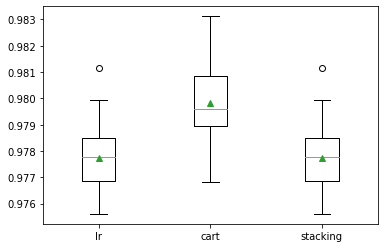

Accuracy: 0.920065948435146


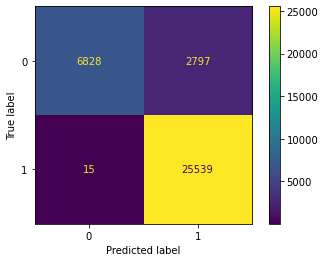

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      9625
           1       0.90      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.85      0.89     35179
weighted avg       0.93      0.92      0.92     35179



In [29]:

#_________________________Binary Classification with feature extraction___________________
X_TR=X_TR[['sttl', 'dttl', 'ct_state_ttl','sbytes','trans_depth']]
X_TS=X_TS[['sttl', 'dttl', 'ct_state_ttl','sbytes','trans_depth']]

# get the models to evaluate
models = Models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate(model, X_TR, Y_TR1)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
model.fit(X_TR, Y_TR1)
y_pred=model.predict(X_TS)



# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score( Y_TS1, y_pred))

plot_confusion_matrix(model, X_TS, Y_TS1,values_format= "d")  
plt.show()


print(classification_report( Y_TS1, y_pred))



>lr 0.898 (0.001)
>cart 0.925 (0.002)
>stacking 0.926 (0.002)


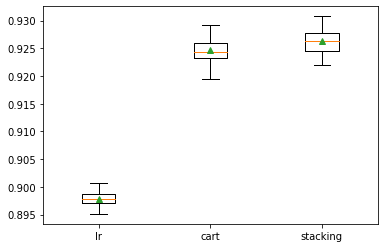

C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [30]:

#____________________________multiClassification with feature extraction_____________________
Y_1=pd.DataFrame(Y_TR1)
Y_2=pd.DataFrame(Y_TR2)
Y_11=pd.DataFrame(Y_TS1)
Y_22=pd.DataFrame(Y_TS2)

df_train = pd.concat([X_TR,Y_2,Y_1],axis=1)
df_test =pd.concat([X_TS,Y_22,Y_11],axis=1)

df_train=df_train.iloc[df_train['label'].replace([0], np.nan).dropna().index.to_numpy(), :].reset_index(drop = True)
df_test=df_test.iloc[df_test['label'].replace([0], np.nan).dropna().index.to_numpy(), :].reset_index(drop = True)

X_TR =df_train.drop('label',axis=1) 
Y_TR =df_train['attack_cat']
X_TR =df_train.drop('attack_cat',axis=1) 

X_TS =df_test.drop('label',axis=1) 
Y_TS =df_test['attack_cat']
X_TS =df_test.drop('attack_cat',axis=1) 



# get the models to evaluate
models = Models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate(model, X_TR, Y_TR)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
model.fit(X_TR, Y_TR)

y_pred=model.predict(X_TS)



Accuracy: 0.9180558816623621


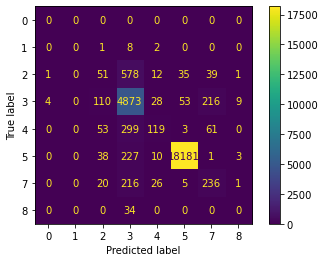

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        11
           2       0.19      0.07      0.10       717
           3       0.78      0.92      0.85      5293
           4       0.60      0.22      0.33       535
           5       0.99      0.98      0.99     18460
           7       0.43      0.47      0.45       504
           8       0.00      0.00      0.00        34

    accuracy                           0.92     25554
   macro avg       0.37      0.33      0.34     25554
weighted avg       0.91      0.92      0.91     25554



C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Moshira\anaconda3\lib\site-packages\sklearn\metr

In [31]:

# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score( Y_TS, y_pred))

plot_confusion_matrix(model, X_TS, Y_TS,values_format= "d")  
plt.show()
print(classification_report( Y_TS, y_pred))
